- SVMとは
サポートベクトルhとは、予測に必要となる一部のデータのことで、このデータを定めるために
マージン最大化と呼ばれる考え方を使う。
マージンとは、判別する境界と、データとの距離をさす。
![](https://logics-of-blue.com/wp-content/uploads/2017/07/svm-7-intro.jpg)
境界の近くにあるデータは、言い換えると「A 種かB種か微妙」な位置にあるデータとみなせる。
そこで、教会とデータとの距離（マージン）を大きくすることで誤判別を防ぐ。

- 線形回帰とロジスティック回帰との比較
　判別分析において、それぞれに適した分布が異なる。
 ロジスティック回帰では、２つのデータ群はだいたい別れているが、集まっていない。
 このだいたいという表現を確率を使って表現する。
 サポートベクターマシーンとロジスティック回帰の違いは、片方のデータの現れ方が0.5以上の領域がないとエラーとなる。
- ハードマージンsvmと、ソフトマージンsvmの違い
ハードマージンは、全ての訓練データがf(x)で分類可能であるという家庭のもと、分類を行う。
しかし、そのようなデータは原人つ的ではなく、一部の訓練データにノイズが乗ったりして、正しく分類できないことがほとんど。
そのようなデータセットを分類する場合、ソフトマージンと呼ばれる手法をsvm上で行う。
どんなに境界に近いデータ点であっても、全てのデータ点は境界とはユーグリッド距離で１以上離れていなくてはならない。
現実的にはこの制約は厳しすぎるので、${y_i(\boldsymbol{w^{\mathrm{T}}x_i}+b) \geq 1-ξ_i \ \ \ (i \in \{1...n\}), \ \ \ ξ_i \geq 0 }$
以上のように制約条件を緩和する、ξiξiは正の整数なので、制約条件の右辺が１以下となります。これはデータ点が境界に近づくことが許されることを表しています。また右辺は負の値にもなり得るので、データ点が境界の反対側に食い込むことすら許容します。この制約緩和をソフトマージンという。
![](https://camo.qiitausercontent.com/6a66ceea00c2f02fd3e75d10cc203e17afdf320a/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f33343732312f30376365373964612d373739322d333939362d613739352d3935373961663130376339382e706e67)
- 　svmの学習時と推定時の計算時間の役割
学習時にfor文で多重の処理をしているので時間がかかる。
389.28628396987915s
0.0004050731658935547s
-  scikit-learnのGridSearchCVの役割
 機械学習のモデルのハイパーパラメータをチューニングする仕組みとして、GridSearchCVが用意されている。
 

In [6]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [56]:
import numpy as np
import matplotlib.pyplot as plt

#SVMのクラス
class  ScratchSVM:
    
  #初期値の設定
    def __init__(self,threshold=1e-5,ite=100
                 ,lr=0.03):
        self.threshold = threshold
        # 更新回数
        self.ite = ite
        # 学習率
        self.lr = lr
        # self.NにXの行数を代入
        self.N = np.shape(X)[0]
        #ラグランジュ乗数の初期化
        self.λ = np.ones((len(X),1))
        
     # SVMの学習部分のメソッド  
    def fit(self,X,y):
      # 最急降下法開始
        count = 0
        # 指定した更新回数分ループする
        while(count < self.ite):
            for i in range(self.N):
                ans = 0
                for j in range(self.N):
                  # 最急降下法の更新式の一部
                  ans += self.λ[j]*y[i]*y[j]*np.dot(X[i].T,X[j])
                # 最急降下法の更新式
                self.λ[i] += self.lr * (1-ans)
                # ラグランジュ乗数は0以上なので負の値をとると、0を代入する。
                if self.λ[i] < 0:
                    self.λ[i] = 0
            count +=1
            print(count)
        #閾値より大きいラグランジュ乗数をサポートベクトルとして取り出す
        self.sv =  np.where(self.λ>1e-5)[0]
        return self.λ,self.sv 
    def predict(self,X):
        pred = 0
        for n in self.sv:
            pred += np.dot(X,X[n].T)*self.λ[n]
#         y_0 = pred[pred > 0] 
#         y_1 = pred[pred < 0] 

        pred = pred.astype(int)
        return pred

In [57]:
model = ScratchSVM()

In [63]:
import time
t0 = time.time()
model.fit(X,y)
t1 = time.time()
print('time : {}s'.format(t1-t0))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
time : 389.28628396987915s


In [65]:

t0 = time.time()
model.predict(X)
t1 = time.time()
print('time : {}s'.format(t1-t0))

time : 0.0004050731658935547s


In [58]:
λ, sv = model.fit(X,y)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [59]:
sv

array([121, 123, 162, 326, 336, 499])

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


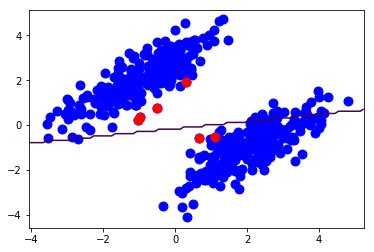

In [60]:
plt.scatter(X[:,0], X[:,1], s=80, c='b', marker='o')
for n in sv:
    plt.scatter(X[n,0], X[n,1], s=80, c='r', marker='o')
    
#サポートベクターも同様にプロット

step = 0.1
mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
pred = model.predict(mesh).reshape(mesh_f0.shape)
plt.contour(mesh_f0, mesh_f1, pred, 1)
plt.show()

In [3]:
#wの乱数の発生
import numpy as np
w = np.random.rand(2)

array([-1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,
        1,  1, -1,  1,  1

In [8]:
# SVMの学習部分のメソッド
def train_svm(self,X,t):
  # 最急降下法開始

    # kernelを計算
    count = 0

    # 指定した更新回数分ループする
    while(count < self.loop):
        for i in range(self.N):
            ans = 0
            for j in range(self.N):
              # 最急降下法の更新式の一部
              ans += self.λ[j]*y[i]*y[j]*np.dot(X[i].T,X[j])
            # 最急降下法の更新式
            self.λ[i] += self.lr * (1-ans)
            # ラグランジュ乗数は0以上なので負の値をとると、0を代入する。
            if λ[i] < 0:
                λ[i] = 0
            count += 1
    #閾値より大きいラグランジュ乗数をサポートベクトルとして取り出す
    self.sv =  np.where(λ>1e-5)[0]
    
def preditc(self,X):
    pred = 0
    for n in self.sv:
        pred += np.dot(X,X[n].T)*λ[n]*y[n]
    pred[pred > 0] =1
    pred[pred < 0] =-1
    pred = pred.astype(int)
    return pred
        
  # 最急降下法終了
    # しきい値以上の値となったラグランジュ乗数をサポートベクトルとして取り出す
#     self.sv = np.where(λ>self.threshold)[0]
#     # サポートベクトルの数
#     self.nsupport = len(self.sv)
#     print self.nsupport,"support vector found"

#     # それぞれサポートベクトルのデータのみを格納していく
#     self.X = X[self.sv,:]
#     self.λ = λ[self.sv]
#     self.y = t[self.sv]

#     # wの計算式
#     self.w = np.array([0.,0.])
#     for i in range(self.nsupport):
#       self.w += self.λ[i]*self.y[i]*self.X[i]

#     # θの計算式
#     self.b = np.sum(self.y)
#     for n in range(self.nsupport):
#       self.b -= np.sum(self.λ*self.t*np.reshape(self.K[self.sv[n],self.sv],(self.nsupport,1)))
#     self.b /= len(self.λ)


In [ ]:
count = 0
while(count< 100):
    for i in range(len(X)):
        ans = 0
        for j in range(len(X)):
          # 最急降下法の更新式の一部
            ans += λ[j]*y[i]*y[j]*np.dot(X[i].T,X[j])
        # 最急降下法の更新式 (lr:学習率)
        λ[i] += lr * (1-ans)
        # ラグランジュ乗数は0以上なので負の値をとると、0を代入する。
        if λ[i] < 0:
            λ[i] = 0
    count +=1
